# Problem Statement : (Binary Classification)
## Create a Neural Network model to predict whether a room is messy or clean

## Importing the required libraries

In [16]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.xception import Xception

In [17]:
print(os.listdir("../input"))

['messy-vs-clean-room']


## Paths for Train & Test directories

In [41]:
train_dir = '../input/messy-vs-clean-room/images/images/train/'
val_dir = '../input/messy-vs-clean-room/images/images/val/'

## Generating extra data from the existing data by using Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [21]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=16,
                                                    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                        target_size=(150,150),
                                                        batch_size=16,
                                                        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Model Building (Transfer Learning : Xception)

In [22]:
conv_base = Xception(include_top=False, input_shape=(150,150,3))

83689472/83683744 [==============================] - 1s 0us/step


In [23]:
# Not training the already trained Convolutional layers from the Pre-trained model
for layer in conv_base.layers:
    layer.trainable = False

In [24]:
# Model with Convolutional Base = Xception & Classifier = Custom made
model = models.Sequential([
                           conv_base,
                           layers.Flatten(),
                           layers.Dropout((0.3)),
                           layers.Dense(512, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dense(256, activation='relu'),
                           layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dropout (Dropout)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [26]:
model.compile(tf.keras.optimizers.Adam(learning_rate=2e-5),
              tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## Training

In [28]:
history = model.fit(train_generator,
                             steps_per_epoch=12,
                             epochs=20,
                             validation_data=validation_generator,
                            validation_steps=2,
                           callbacks=[callback])

model.save('messy_vs_clean_room.h5')

Epoch 1/20
12/12 [==============================] - 17s 1s/step - loss: 0.7559 - accuracy: 0.5869 - val_loss: 0.4324 - val_accuracy: 0.8500
Epoch 2/20
12/12 [==============================] - 12s 1s/step - loss: 0.4101 - accuracy: 0.8023 - val_loss: 0.4004 - val_accuracy: 0.8500
Epoch 3/20
12/12 [==============================] - 13s 1s/step - loss: 0.2653 - accuracy: 0.8810 - val_loss: 0.3593 - val_accuracy: 0.9000
Epoch 4/20
12/12 [==============================] - 12s 1s/step - loss: 0.1867 - accuracy: 0.9216 - val_loss: 0.2065 - val_accuracy: 0.9500
Epoch 5/20
12/12 [==============================] - 13s 1s/step - loss: 0.2736 - accuracy: 0.8918 - val_loss: 0.4602 - val_accuracy: 0.7500
Epoch 6/20
12/12 [==============================] - 12s 1s/step - loss: 0.2000 - accuracy: 0.9163 - val_loss: 0.3096 - val_accuracy: 0.8500
Epoch 7/20
12/12 [==============================] - 12s 1s/step - loss: 0.1474 - accuracy: 0.9518 - val_loss: 0.1578 - val_accuracy: 0.9500
Epoch 8/20
12/12 [==

In [29]:
history.history

{'loss': [0.6941563487052917,
  0.34760192036628723,
  0.23268546164035797,
  0.19957083463668823,
  0.23654687404632568,
  0.1785745620727539,
  0.1604105532169342,
  0.24368594586849213,
  0.12769430875778198,
  0.12815141677856445,
  0.18197061121463776,
  0.15179942548274994],
 'accuracy': [0.65625,
  0.8489583134651184,
  0.9114583134651184,
  0.9166666865348816,
  0.9114583134651184,
  0.9322916865348816,
  0.9479166865348816,
  0.9270833134651184,
  0.9583333134651184,
  0.9322916865348816,
  0.9270833134651184,
  0.9322916865348816],
 'val_loss': [0.43244433403015137,
  0.40042558312416077,
  0.35928618907928467,
  0.2064584195613861,
  0.4602054953575134,
  0.3096441328525543,
  0.15777643024921417,
  0.12280227243900299,
  0.3046397864818573,
  0.2477254420518875,
  0.19650661945343018,
  0.2696226239204407],
 'val_accuracy': [0.8500000238418579,
  0.8500000238418579,
  0.8999999761581421,
  0.949999988079071,
  0.75,
  0.8500000238418579,
  0.949999988079071,
  0.94999998807

## Results

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [43]:
print(f'Training Accuracy : {sum(acc)/len(acc)}')
print(f'Training Loss : {sum(loss)/len(loss)}')
print(f'\nValidation Accuracy : {sum(val_acc)/len(val_acc)}')
print(f'Validation Loss : {sum(val_loss)/len(val_loss)}')

Training Accuracy : 0.9001736094554266
Training Loss : 0.24023735523223877

Validation Accuracy : 0.875
Validation Loss : 0.2889614440500736


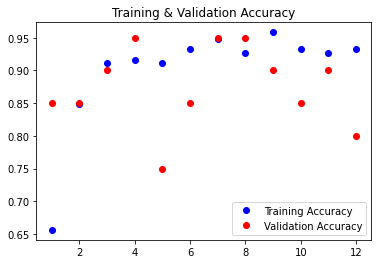

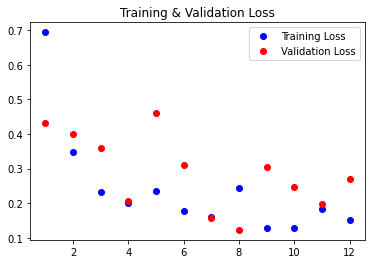

In [35]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()